In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('train_and_test.csv')

In [5]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,PubchemFP40,PubchemFP41,PubchemFP42,PubchemFP43,PubchemFP44,PubchemFP45,PubchemFP46,PubchemFP47,PubchemFP48,PubchemFP49,PubchemFP50,PubchemFP51,PubchemFP52,PubchemFP53,PubchemFP54,PubchemFP55,PubchemFP56,PubchemFP57,PubchemFP58,PubchemFP59,...,PubchemFP822,PubchemFP823,PubchemFP824,PubchemFP825,PubchemFP826,PubchemFP827,PubchemFP828,PubchemFP829,PubchemFP830,PubchemFP831,PubchemFP832,PubchemFP833,PubchemFP834,PubchemFP835,PubchemFP836,PubchemFP837,PubchemFP838,PubchemFP839,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.300162
2886,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
2887,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
df1 = df.copy()

In [ ]:
# will start by removing features based var threshold

In [34]:
perf_score = pd.DataFrame(columns=['Model','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#


    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)




####



def update_performance (name, model):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)


In [25]:
X = df1.drop(columns =['pIC50'])
y = df1['pIC50']
xtrain,xtest,ytrain,ytest = train_test_split(X,y , train_size=0.80,random_state=1)

In [18]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

in base model building we have done RFE with decision tree for n number for features

and reduced it o 52
and now we will perform sfs with best condition and reduce it again .

and try diff base models and which ever comming better we will go for hyperparameter tuning

In [22]:
tree = DecisionTreeRegressor()

In [26]:
    rfe =RFE(estimator=tree,n_features_to_select=52)
    rfe.fit(xtrain,ytrain)
    
    a = rfe.get_feature_names_out()
    

In [46]:
a = list(a)
a

['PubchemFP2',
 'PubchemFP12',
 'PubchemFP14',
 'PubchemFP16',
 'PubchemFP19',
 'PubchemFP23',
 'PubchemFP37',
 'PubchemFP186',
 'PubchemFP257',
 'PubchemFP258',
 'PubchemFP259',
 'PubchemFP261',
 'PubchemFP297',
 'PubchemFP335',
 'PubchemFP365',
 'PubchemFP366',
 'PubchemFP374',
 'PubchemFP385',
 'PubchemFP419',
 'PubchemFP431',
 'PubchemFP432',
 'PubchemFP437',
 'PubchemFP438',
 'PubchemFP457',
 'PubchemFP515',
 'PubchemFP516',
 'PubchemFP542',
 'PubchemFP546',
 'PubchemFP572',
 'PubchemFP585',
 'PubchemFP592',
 'PubchemFP593',
 'PubchemFP594',
 'PubchemFP617',
 'PubchemFP618',
 'PubchemFP641',
 'PubchemFP645',
 'PubchemFP647',
 'PubchemFP667',
 'PubchemFP688',
 'PubchemFP696',
 'PubchemFP697',
 'PubchemFP700',
 'PubchemFP712',
 'PubchemFP735',
 'PubchemFP737',
 'PubchemFP755',
 'PubchemFP756',
 'PubchemFP777',
 'PubchemFP797',
 'PubchemFP798',
 'PubchemFP860']

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(X[a],y , train_size=0.80,random_state=1)

In [49]:
xtrain.shape

(2312, 52)

In [50]:
# now we will try feature selection using random forrest
tree = DecisionTreeRegressor()
sel =sfs(estimator=tree,k_features='best')
sel.fit(xtrain,ytrain)
b = sel.k_feature_names_

In [54]:
b=list(b)

In [73]:

['PubchemFP2',
 'PubchemFP14',
 'PubchemFP16',
 'PubchemFP257',
 'PubchemFP258',
 'PubchemFP261',
 'PubchemFP365',
 'PubchemFP419',
 'PubchemFP431',
 'PubchemFP432',
 'PubchemFP437',
 'PubchemFP438',
 'PubchemFP457',
 'PubchemFP516',
 'PubchemFP572',
 'PubchemFP593',
 'PubchemFP641',
 'PubchemFP647',
 'PubchemFP697',
 'PubchemFP737',
 'PubchemFP860']

['PubchemFP2',
 'PubchemFP14',
 'PubchemFP16',
 'PubchemFP257',
 'PubchemFP258',
 'PubchemFP261',
 'PubchemFP365',
 'PubchemFP419',
 'PubchemFP431',
 'PubchemFP432',
 'PubchemFP437',
 'PubchemFP438',
 'PubchemFP457',
 'PubchemFP516',
 'PubchemFP572',
 'PubchemFP593',
 'PubchemFP641',
 'PubchemFP647',
 'PubchemFP697',
 'PubchemFP737',
 'PubchemFP860']

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(X[b],y , train_size=0.80,random_state=1)

In [56]:
tree = DecisionTreeRegressor()
model_tree = tree.fit(xtrain,ytrain)
update_performance('DT_base_model',model_tree)
perf_score

C:\Users\ajish\AppData\Local\Temp\ipykernel_22188\679569538.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'          : name,


,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.53633,0.332656,0.986738,1.125244,15.068827


In [57]:
rf = RandomForestRegressor()
model_rf = rf.fit(xtrain,ytrain)
update_performance('RF_base_model',model_rf)
perf_score

C:\Users\ajish\AppData\Local\Temp\ipykernel_22188\679569538.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'          : name,


,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908


In [61]:
tree = DecisionTreeRegressor()
params = {'max_depth':[2,5,6,7,8,10,15,20,25,30]
         ,'min_samples_split':[1,2,3,4,5,6,7,8],
         'min_samples_leaf' :[1,2,3,4,5]}
grd_dt = GridSearchCV(estimator=tree, param_grid=params,cv = 3)
grd_dt.fit(xtrain,ytrain)

C:\Users\ajish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ajish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajish\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ajish\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float i

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 6, 7, 8, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8]})

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
grd_dt.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 6}

In [64]:
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=5,min_samples_split=6)
model_tree = tree.fit(xtrain,ytrain)
update_performance('DT_base_tuned',model_tree)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505


In [65]:
rf = RandomForestRegressor()
params = {'n_estimators':[50,100,110,125,150]
    ,'max_depth':[2,5,6,7,8,10,15,20,25,30]
         ,'min_samples_split':[1,2,3,4,5,6,7,8],
         'min_samples_leaf' :[1,2,3,4,5]}
grd_rf = GridSearchCV(estimator=rf, param_grid=params,cv = 3)
grd_rf.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 6, 7, 8, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 110, 125, 150]})

In [67]:
grd_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 125}

In [68]:
rf= RandomForestRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=8,n_estimators=125)
model_rf = rf.fit(xtrain,ytrain)
update_performance('RF_base_tuned',model_rf)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505
4,RF_base_tuned,0.506041,0.379472,1.018458,1.085057,14.738706


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gdb =GradientBoostingRegressor()

model_GBR =gdb.fit(xtrain,ytrain)
update_performance('GBR_base',model_GBR)
perf_score

C:\Users\ajish\AppData\Local\Temp\ipykernel_22188\679569538.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_score = perf_score.append({'Model'          : name,


,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150


In [69]:
gb_regressor = GradientBoostingRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],                   # Maximum depth of a tree
    'subsample': [0.8, 1.0],                  # Fraction of samples used for fitting trees
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3)

# Fit the grid search on the training data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
grid_search.best_params_


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

In [70]:
gdb =GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, n_estimators=100, subsample= 0.8)

model_GBR_tuned =gdb.fit(xtrain,ytrain)
update_performance('GBR_base_tuned',model_GBR_tuned)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505
4,RF_base_tuned,0.506041,0.379472,1.018458,1.085057,14.738706
5,GBR_base_tuned,0.473754,0.378326,1.051216,1.086059,14.828952


In [71]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505
4,RF_base_tuned,0.506041,0.379472,1.018458,1.085057,14.738706
5,GBR_base_tuned,0.473754,0.378326,1.051216,1.086059,14.828952


In [78]:
from xgboost import XGBRegressor

In [79]:
xgb = XGBRegressor()
model_xgb_base = xgb.fit(xtrain, ytrain)
update_performance('xgb_base',model_xgb_base)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505
4,RF_base_tuned,0.506041,0.379472,1.018458,1.085057,14.738706
5,GBR_base_tuned,0.473754,0.378326,1.051216,1.086059,14.828952
6,xgb_base,0.531437,0.366210,0.991931,1.096591,14.834998


In [81]:

regressor = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'max_depth': [3, 4, 5],                # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001],   # Learning rate
    'subsample': [0.8, 0.9, 1.0],          # Fraction of samples used in each boosting round
    'colsample_bytree': [0.8, 0.9, 1.0]    # Fraction of features used in each boosting round
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters and trained model
best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_


In [82]:
best_params

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [83]:
best_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
xgb = best_regressor
model_xgb_base_tuned = xgb.fit(xtrain, ytrain)
update_performance('xgb_base_tuned',model_xgb_base_tuned)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505
4,RF_base_tuned,0.506041,0.379472,1.018458,1.085057,14.738706
5,GBR_base_tuned,0.473754,0.378326,1.051216,1.086059,14.828952
6,xgb_base,0.531437,0.366210,0.991931,1.096591,14.834998
7,xgb_base_tuned,0.495777,0.383147,1.028985,1.081839,14.753985


In [85]:
perf_score['Eror_diff'] = perf_score['RMSE TEST']-perf_score['RMSE Train']

In [88]:
perf_score.sort_values(by ='RMSE TEST')

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE,Eror_diff
7,xgb_base_tuned,0.495777,0.383147,1.028985,1.081839,14.753985,0.052854
4,RF_base_tuned,0.506041,0.379472,1.018458,1.085057,14.738706,0.066600
5,GBR_base_tuned,0.473754,0.378326,1.051216,1.086059,14.828952,0.034843
1,RF_base_model,0.529944,0.371085,0.993510,1.092365,14.850908,0.098855
2,GBR_base,0.433894,0.368046,1.090301,1.095002,15.143150,0.004701
6,xgb_base,0.531437,0.366210,0.991931,1.096591,14.834998,0.104660
3,DT_base_tuned,0.480455,0.360242,1.044501,1.101742,15.017505,0.057241
0,DT_base_model,0.536330,0.332656,0.986738,1.125244,15.068827,0.138506


<AxesSubplot:xlabel='pIC50'>

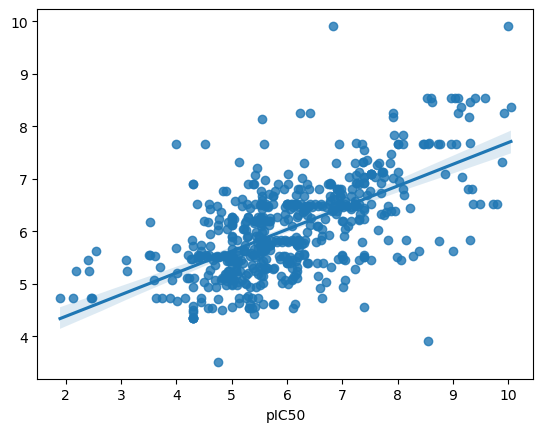

In [89]:
sns.regplot(ytest,model_xgb_base_tuned.predict(xtest))

which does not imply a strong correlation. This is expected as PubChem fingerprints is a less accurate molecular representation of the compounds compared to newer techniques.⁷ However, visually, the points are clustered around the linear regression line and there are a reasonable amount of outliers, so the model did fit the data to a reasonable extent. This script can be improved by using a more accurate molecular fingerprint and potentially using other models that can fit the data better.

A rough guide to interpreting pIC50 values:

pIC50 > 9: High potency, strong inhibition. pIC50 in the range of 6 to 9: Moderate potency. pIC50 < 6: Lower potency, weaker inhibition.

Xgboost has the highest r2 score and lowest error comparing other models

Due to low computational power we were limited to the use of Decision Tree as the estimator in the feature selection methods.

main problem with activity preddiction is the that the we have less number of records and will result in the
high bias and less predective situtaion .

Data for the activity  molecules is less and also the pubchem fingerprint that produces binary result for that feature
has now proven not be an accurate solution for activity prediction.

we should explore other kinds of molecular descriptors for the activity prediction

The test error obatined for our best performing model is 1.081839 

In [ ]:
model_xgb_base_tuned

In [91]:
import pickle

In [92]:

regressor = model_xgb_base_tuned
# Save the trained regressor using pickle
with open('xgb_base_tuned.pkl', 'wb') as file:
    pickle.dump(regressor, file)

# Load the regressor from the saved file
with open('xgb_base_tuned.pkl', 'rb') as file:
    loaded_regressor = pickle.load(file)



In [94]:
# Make predictions on new data using the loaded regressor
new_predictions = loaded_regressor.predict(xtest)

# Calculate RMSE for the predictions
rmse = mean_squared_error(ytest, new_predictions, squared=False)
print("RMSE:", rmse)

RMSE: 1.0818389402545345
